# Schelling model of social segregation

In 1969 Schelling studied the emergent property of segregation. He developed a very simple model where agents have a 'happiness' factor when they are in the vincinity of other people that share similar traits. The model shows that even a small fraction of preference regardless of intent can lead to total segregation. 

## Agent behavior
An agent is said to be happy if $\theta$ nearest neighbor share fraction $\rho$ of similar features.  The amount of overlap in preference $\rho$ will form a decision boundary for the agent to move or not. It will move if the agent is unhappy and conversely remain fixed in position if it is happy. The agents will be spawned on a unit grid  $G = (0, 1)^2$ and each agent will have a position on that grid $s_i \in G$. Each agent will be given an arbritrary label $q \in Q_n := \{0, 1, \dots n\}$ of at most $n$ states. 


<IPython.core.display.Javascript object>


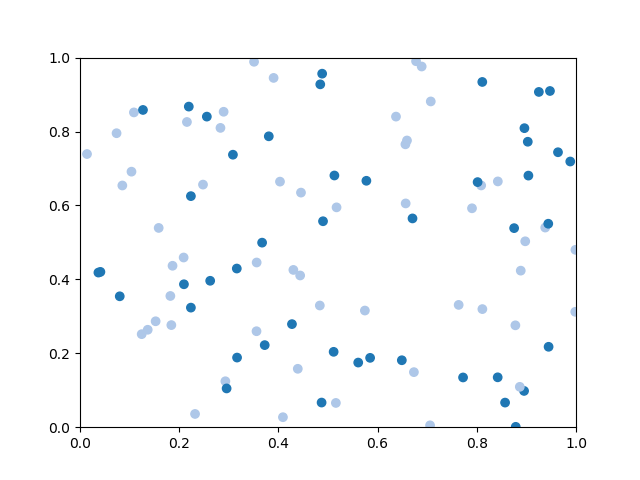

interactive(children=(IntSlider(value=0, description='time', max=499), Output()), _dom_classes=('widget-intera…

In [50]:
import numpy as np, matplotlib.pyplot as plt

n      = 100 # number of agents
nStates= 2   # preference labels
theta  = 20  # neighbors to consider
rho    = .2# fraction to consider
eta    = 0.1e-3 # update for move
dims   = np.array([[0, 1], [0, 1]], dtype = int) # grid 

states = np.random.randint(0, nStates, size = n) # states of agents
nSim   = 500

idx    = np.arange(n)
# naive approach; need method for fast local nearest neighbor -> partition the space?

data = np.random.rand(nSim, n, 2) # keep track of positions
from scipy import spatial
for time in range(1, nSim):
    np.random.shuffle(idx)
    for agent in idx:
        # get nearest neighbors
        s = np.linalg.norm(data[time - 1] - data[time -1, agent], axis = 1)
        s = np.argsort(s)
        neighbors = s[:theta]
        rho_bar = (states[neighbors] == states[agent]).mean()
        if rho_bar < rho:
            data[time, agent] = np.random.rand(1, 2)
        else:
            data[time, agent] = data[time - 1, agent]
            
        
            
colors = plt.cm.tab20(states)
%matplotlib notebook
fig, ax = plt.subplots()
ax.set(xlim = (0, 1), ylim = (0, 1))
h = ax.scatter(*data[0].T, color = colors)
# h.set_offset_position('data')
print(h)
fig.show()

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

slider = widgets.IntSlider(min = 0, max = nSim - 1, value = 0)
@interact(time = slider)
def update(time = 0):
    h.set_offsets(data[time])# ?
    fig.canvas.draw()
    fig.canvas.flush_events()


In [37]:
from scipy import spatial
print(data.shape)

(500, 100, 2)


(4950,)